In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import regex
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

In [2]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [3]:
df_starbucks = pd.read_csv('directory.csv')
df_starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [4]:
df_starbucks = df_starbucks[(df_starbucks['Brand'] == 'Starbucks')]
df_starbucks = df_starbucks[df_starbucks['Country'] == 'US'].reset_index(drop=True)
df_starbucks.shape

(13311, 13)

In [5]:
df_cityre = pd.read_csv('City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')
df_cityre.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,1996-02-29,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,195870.0,195305.0,...,656637.0,655351.0,654130.0,653072.0,652831.0,653085.0,653094.0,652246.0,652106.0,651485.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,186516.0,186493.0,...,722785.0,725378.0,728666.0,731044.0,734746.0,738227.0,743785.0,748836.0,752594.0,752510.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,94293.0,94409.0,...,189782.0,190184.0,190782.0,191229.0,191748.0,191902.0,192373.0,193260.0,194337.0,195208.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,132510.0,132361.0,...,251764.0,251538.0,251343.0,251156.0,251086.0,251261.0,251614.0,252135.0,252342.0,252473.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,94895.0,94862.0,...,185743.0,186661.0,187287.0,188003.0,188114.0,188573.0,188630.0,189089.0,189113.0,189246.0


In [6]:
mask = list(df_cityre['RegionName'])
us_star = df_starbucks[df_starbucks['City'].apply(lambda x: True if x in mask else False)]
us_star_count = us_star.groupby(['State/Province', 'City']).size().reset_index()
print(us_star_count.head())

  State/Province         City   0
0             AK    Anchorage  23
1             AK  Eagle River   3
2             AK    Fairbanks   5
3             AK        Homer   1
4             AK       Juneau   2


In [7]:
df_sb_rev = pd.merge_ordered(left = us_star_count, right = df_cityre, left_on = ['City', 'State/Province'], right_on = ['RegionName', 'State'], how = 'right')
df_sb_rev.rename(columns = {0: 'SBC'}, inplace = True)
df_sb_rev.drop(['State/Province', 'City'], axis = 1, inplace = True)
df_sb_rev['SBC'].fillna(0, inplace = True)
df_sb_rev.head()

,SBC,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1996-01-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,0.0,50631,29449,Aaronsburg,City,PA,PA,State College,Centre County,NaN,...,189327.0,189220.0,190406.0,190708.0,190633.0,190957.0,191563.0,192705.0,193022.0,192948.0
1,0.0,10031,7250,Abbeville,City,AL,AL,Dothan,Henry County,NaN,...,88631.0,89032.0,89423.0,89658.0,89783.0,89965.0,90169.0,90486.0,90938.0,91313.0
2,0.0,50632,9494,Abbeville,City,GA,GA,NaN,Wilcox County,NaN,...,71650.0,71936.0,71983.0,71913.0,71795.0,71846.0,71962.0,72068.0,71992.0,72070.0
3,0.0,23389,2216,Abbeville,City,LA,LA,Lafayette,Vermilion Parish,NaN,...,132088.0,132046.0,131885.0,131645.0,131266.0,130901.0,131159.0,131120.0,131846.0,131879.0
4,0.0,30113,13553,Abbeville,City,MS,MS,Oxford,Lafayette County,NaN,...,130415.0,130692.0,131236.0,131878.0,132484.0,132508.0,132583.0,132710.0,132668.0,132358.0


16624    15.165751
4261     13.379088
12841    12.369317
21275    12.288206
11056    12.288206
           ...    
9434      0.000000
9433      0.000000
9432      0.000000
9431      0.000000
26704     0.000000
Name: SBC, Length: 26705, dtype: float64
6.192322008190548 30.157678806735998


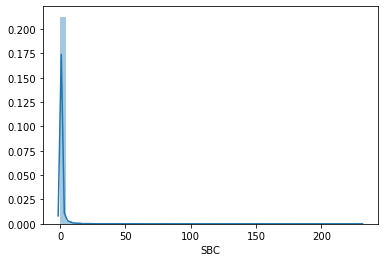

In [46]:
plot_df = df_sb_rev.sort_values('SBC', ascending = False)

logsbc = np.sqrt(plot_df['SBC'])
print(logsbc)
print(logsbc.skew(), plot_df['SBC'].skew())
sns.distplot(plot_df['SBC'])

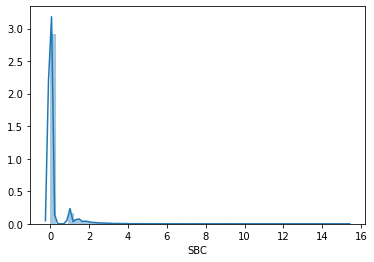

In [48]:
sns.distplot(logsbc)

ValueError: Data must be positive.

In [8]:
select_info = df_sb_rev.iloc[:, np.r_[0:8, range(-41,0)]]
select_info = select_info.drop(['RegionID', 'RegionType', 'StateName', 'Metro'], axis = 1)
select_info

,SBC,SizeRank,RegionName,State,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,0.0,29449,Aaronsburg,PA,174904.0,177759.0,180309.0,182037.0,183431.0,183149.0,...,189327.0,189220.0,190406.0,190708.0,190633.0,190957.0,191563.0,192705.0,193022.0,192948.0
1,0.0,7250,Abbeville,AL,79700.0,79605.0,79443.0,79385.0,79362.0,79430.0,...,88631.0,89032.0,89423.0,89658.0,89783.0,89965.0,90169.0,90486.0,90938.0,91313.0
2,0.0,9494,Abbeville,GA,59864.0,60273.0,60547.0,60911.0,61347.0,61765.0,...,71650.0,71936.0,71983.0,71913.0,71795.0,71846.0,71962.0,72068.0,71992.0,72070.0
3,0.0,2216,Abbeville,LA,124085.0,125973.0,127569.0,128708.0,129530.0,130065.0,...,132088.0,132046.0,131885.0,131645.0,131266.0,130901.0,131159.0,131120.0,131846.0,131879.0
4,0.0,13553,Abbeville,MS,114534.0,113954.0,113786.0,114280.0,114990.0,115401.0,...,130415.0,130692.0,131236.0,131878.0,132484.0,132508.0,132583.0,132710.0,132668.0,132358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,0.0,22237,Zumbro Falls,MN,267695.0,269366.0,271105.0,272514.0,274314.0,276068.0,...,311461.0,313080.0,313691.0,313845.0,314027.0,313808.0,313436.0,313265.0,313457.0,314039.0
26701,0.0,9073,Zumbrota,MN,178096.0,179796.0,180880.0,181795.0,182792.0,184994.0,...,205717.0,204755.0,203622.0,203110.0,203877.0,205861.0,207716.0,210072.0,212871.0,216463.0
26702,0.0,15387,Zuni,VA,208452.0,209251.0,209937.0,210638.0,211418.0,212122.0,...,233522.0,234551.0,235518.0,235879.0,235210.0,234287.0,233998.0,234048.0,234212.0,234285.0
26703,0.0,21924,Zwingle,IA,194652.0,196104.0,197986.0,199336.0,200247.0,201830.0,...,211985.0,212960.0,213860.0,214923.0,215668.0,217160.0,217850.0,219099.0,220120.0,221330.0


In [9]:
null_columns=select_info.columns[select_info.isnull().any()]
select_info[null_columns].isnull().sum(), select_info.shape

(2017-01-31    407
 2017-02-28    390
 2017-03-31    362
 2017-04-30    344
 2017-05-31    311
 2017-06-30    292
 2017-07-31    273
 2017-08-31    257
 2017-09-30    235
 2017-10-31    205
 2017-11-30    186
 2017-12-31    170
 2018-01-31     93
 2018-02-28     58
 2018-03-31     22
 dtype: int64,
 (26705, 45))

In [10]:
print(len(select_info[select_info.isnull().any(axis=1)][null_columns]))

407


In [11]:
select_info.dropna(inplace = True)
select_info.shape

(26298, 45)

In [52]:

boxcox_df = select_info
print(boxcox_df['SBC'].min())
sbc_boxcox = stats.boxcox(boxcox_df['SBC'])[0]
pd.Series(sbc_boxcox).skew()

0.0


ValueError: Data must be positive.

In [12]:
re_values = select_info.iloc[:, 4:]
re_values

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,174904.0,177759.0,180309.0,182037.0,183431.0,183149.0,182709.0,181027.0,180550.0,178917.0,...,189327.0,189220.0,190406.0,190708.0,190633.0,190957.0,191563.0,192705.0,193022.0,192948.0
1,79700.0,79605.0,79443.0,79385.0,79362.0,79430.0,79797.0,80486.0,81162.0,81586.0,...,88631.0,89032.0,89423.0,89658.0,89783.0,89965.0,90169.0,90486.0,90938.0,91313.0
2,59864.0,60273.0,60547.0,60911.0,61347.0,61765.0,62358.0,62745.0,63084.0,63445.0,...,71650.0,71936.0,71983.0,71913.0,71795.0,71846.0,71962.0,72068.0,71992.0,72070.0
3,124085.0,125973.0,127569.0,128708.0,129530.0,130065.0,130656.0,131981.0,133646.0,134474.0,...,132088.0,132046.0,131885.0,131645.0,131266.0,130901.0,131159.0,131120.0,131846.0,131879.0
4,114534.0,113954.0,113786.0,114280.0,114990.0,115401.0,116165.0,117315.0,118587.0,119653.0,...,130415.0,130692.0,131236.0,131878.0,132484.0,132508.0,132583.0,132710.0,132668.0,132358.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,267695.0,269366.0,271105.0,272514.0,274314.0,276068.0,278384.0,280361.0,282455.0,283898.0,...,311461.0,313080.0,313691.0,313845.0,314027.0,313808.0,313436.0,313265.0,313457.0,314039.0
26701,178096.0,179796.0,180880.0,181795.0,182792.0,184994.0,187323.0,190291.0,193097.0,196507.0,...,205717.0,204755.0,203622.0,203110.0,203877.0,205861.0,207716.0,210072.0,212871.0,216463.0
26702,208452.0,209251.0,209937.0,210638.0,211418.0,212122.0,212769.0,213423.0,214006.0,214507.0,...,233522.0,234551.0,235518.0,235879.0,235210.0,234287.0,233998.0,234048.0,234212.0,234285.0
26703,194652.0,196104.0,197986.0,199336.0,200247.0,201830.0,203126.0,204857.0,205957.0,206861.0,...,211985.0,212960.0,213860.0,214923.0,215668.0,217160.0,217850.0,219099.0,220120.0,221330.0


In [13]:
monthly_change = re_values.diff(axis = 1)
monthly_change

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,NaN,2855.0,2550.0,1728.0,1394.0,-282.0,-440.0,-1682.0,-477.0,-1633.0,...,1411.0,-107.0,1186.0,302.0,-75.0,324.0,606.0,1142.0,317.0,-74.0
1,NaN,-95.0,-162.0,-58.0,-23.0,68.0,367.0,689.0,676.0,424.0,...,211.0,401.0,391.0,235.0,125.0,182.0,204.0,317.0,452.0,375.0
2,NaN,409.0,274.0,364.0,436.0,418.0,593.0,387.0,339.0,361.0,...,345.0,286.0,47.0,-70.0,-118.0,51.0,116.0,106.0,-76.0,78.0
3,NaN,1888.0,1596.0,1139.0,822.0,535.0,591.0,1325.0,1665.0,828.0,...,-5.0,-42.0,-161.0,-240.0,-379.0,-365.0,258.0,-39.0,726.0,33.0
4,NaN,-580.0,-168.0,494.0,710.0,411.0,764.0,1150.0,1272.0,1066.0,...,480.0,277.0,544.0,642.0,606.0,24.0,75.0,127.0,-42.0,-310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,NaN,1671.0,1739.0,1409.0,1800.0,1754.0,2316.0,1977.0,2094.0,1443.0,...,1791.0,1619.0,611.0,154.0,182.0,-219.0,-372.0,-171.0,192.0,582.0
26701,NaN,1700.0,1084.0,915.0,997.0,2202.0,2329.0,2968.0,2806.0,3410.0,...,-665.0,-962.0,-1133.0,-512.0,767.0,1984.0,1855.0,2356.0,2799.0,3592.0
26702,NaN,799.0,686.0,701.0,780.0,704.0,647.0,654.0,583.0,501.0,...,758.0,1029.0,967.0,361.0,-669.0,-923.0,-289.0,50.0,164.0,73.0
26703,NaN,1452.0,1882.0,1350.0,911.0,1583.0,1296.0,1731.0,1100.0,904.0,...,1597.0,975.0,900.0,1063.0,745.0,1492.0,690.0,1249.0,1021.0,1210.0


In [14]:
percent_change = (monthly_change / re_values) * 100
percent_change

,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,...,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31
0,NaN,1.606107,1.414239,0.949258,0.759959,-0.153973,-0.240820,-0.929143,-0.264193,-0.912714,...,0.745271,-0.056548,0.622880,0.158357,-0.039343,0.169672,0.316345,0.592616,0.164230,-0.038352
1,NaN,-0.119339,-0.203920,-0.073062,-0.028981,0.085610,0.459917,0.856049,0.832902,0.519697,...,0.238066,0.450400,0.437248,0.262107,0.139225,0.202301,0.226242,0.350330,0.497042,0.410675
2,NaN,0.678579,0.452541,0.597593,0.710711,0.676759,0.950961,0.616782,0.537379,0.568997,...,0.481507,0.397576,0.065293,-0.097340,-0.164357,0.070985,0.161196,0.147083,-0.105567,0.108228
3,NaN,1.498734,1.251088,0.884949,0.634602,0.411333,0.452333,1.003932,1.245829,0.615732,...,-0.003785,-0.031807,-0.122076,-0.182308,-0.288727,-0.278837,0.196708,-0.029744,0.550642,0.025023
4,NaN,-0.508977,-0.147646,0.432272,0.617445,0.356149,0.657685,0.980267,1.072630,0.890910,...,0.368056,0.211949,0.414520,0.486814,0.457414,0.018112,0.056568,0.095697,-0.031658,-0.234213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,NaN,0.620346,0.641449,0.517038,0.656182,0.635351,0.831944,0.705162,0.741357,0.508281,...,0.575032,0.517120,0.194778,0.049069,0.057957,-0.069788,-0.118685,-0.054586,0.061252,0.185327
26701,NaN,0.945516,0.599292,0.503314,0.545429,1.190309,1.243307,1.559716,1.453156,1.735307,...,-0.323260,-0.469830,-0.556423,-0.252080,0.376207,0.963757,0.893046,1.121520,1.314881,1.659406
26702,NaN,0.381838,0.326765,0.332798,0.368937,0.331884,0.304086,0.306434,0.272422,0.233559,...,0.324595,0.438711,0.410584,0.153045,-0.284427,-0.393961,-0.123505,0.021363,0.070022,0.031159
26703,NaN,0.740423,0.950572,0.677248,0.454938,0.784323,0.638028,0.844980,0.534092,0.437008,...,0.753355,0.457832,0.420836,0.494596,0.345438,0.687051,0.316732,0.570062,0.463838,0.546695


In [15]:
kmeancluster = 5
model = KMeans(n_clusters = kmeancluster)

data_samples = select_info['SBC'].values.reshape(-1,1)
model.fit(data_samples)
labels = model.predict(data_samples)
select_info['Labels'] = labels
select_info['TotalPct'] = ((select_info['2020-05-31'] / select_info['2017-01-31']) - 1) * 100

In [16]:
select_info['Labels'].value_counts()

0    25531
3      648
2       96
4       16
1        7
Name: Labels, dtype: int64

In [19]:
medians = pd.DataFrame(pd.np.empty((0, 41)), columns = percent_change.columns)
for label in range(kmeancluster):
    selected_frame = select_info['Labels'] == label
    printer_frame = select_info[selected_frame]
    print(label, ':  Number of Entries:', len(printer_frame), 'Max: ', printer_frame['SBC'].max(), 'Min: ', printer_frame['SBC'].min())
    selected_diff = percent_change[selected_frame]
    medians.loc[label] = selected_diff.median()


C:\Users\tpacu\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


0 :  Number of Entries: 25531 Max:  3.0 Min:  0.0
1 :  Number of Entries: 7 Max:  230.0 Min:  125.0
2 :  Number of Entries: 96 Max:  47.0 Min:  15.0
3 :  Number of Entries: 648 Max:  14.0 Min:  4.0
4 :  Number of Entries: 16 Max:  108.0 Min:  52.0


C:\Users\tpacu\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:995: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
C:\Users\tpacu\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1116: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


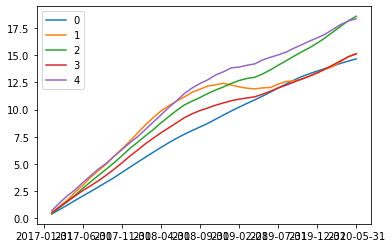

In [20]:
medians.T.cumsum().plot.line()